<a href="https://colab.research.google.com/github/crimama/crimama/blob/Bigdata_course/21_11_26_%EC%8B%A4%EC%8A%B5%EC%A7%80_flawed_iris_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loss categorical_crossentropy

2가지 crossentropy 사용 방법
- categorical_crossentropy
- sparse_categorical_crossentropy

## categorical_crossentropy
y의 값이 one hot encoding인 경우
```
1,0,0
0,1,0
0,0,1
```

출력 레이어 설정
```
model.add(Dense(3, activation="softmax")) # 출력 레이어
```

loss 설정
```
model.compile(..., loss='categorical_crossentropy')
```


## sparse_categorical_crossentropy
y의 값이 one hot encoding인 경우
```
0
1
2
```

출력 레이어 설정
```
model.add(Dense(3, activation="softmax")) # 출력 레이어. 1이 아니라 클래스 수 3
```

loss 설정
```
model.compile(..., loss='sparse_categorical_crossentropy')
```





# iris_dnn with category index

아래의 코드는 dnn_iris_and_optimizer.ipynb의 코드를 기반으로 한다.


In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [302]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv  

--2021-11-26 08:18:57--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2782 (2.7K) [text/plain]
Saving to: ‘flawed_iris.csv.2’

flawed_iris.csv.2   100%[===================>]   2.72K  --.-KB/s    in 0s      

2021-11-26 08:18:57 (25.8 MB/s) - ‘flawed_iris.csv.2’ saved [2782/2782]



In [303]:
iris = pd.read_csv("flawed_iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,color,class
0,6.4,2.8,5.6,2.2,light,2.0
1,5.0,2.3,3.3,1.0,medium,1.0
2,4.9,2.5,4.5,1.7,medium,2.0
3,4.9,3.1,1.5,0.1,dark,0.0
4,5.7,3.8,1.7,0.3,dark,0.0


### 전처리 
- 이상치 
- 결측치
- 컬럼 
- 정규화, 표준화 
- 인코딩 


#### 데이터 확인 

In [304]:
#데이터 상태 확인 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    object 
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          117 non-null    object 
 5   class          119 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.8+ KB


In [305]:
#널값 확인 
iris.isnull().sum()

septal_length    3
septal_width     2
petal_length     3
petal_width      2
color            3
class            1
dtype: int64

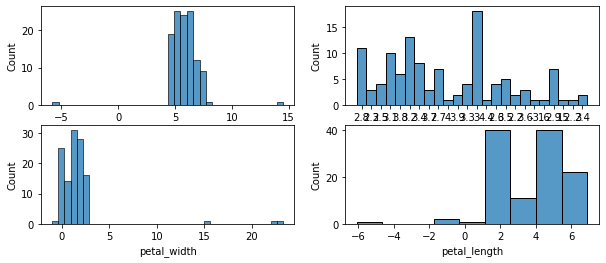

In [306]:
fig = plt.figure(figsize = (10,4))

plt.subplot(221)
sns.histplot(data=iris,x='septal_length')

plt.subplot(222)
sns.histplot(data=iris,x='septal_width')
plt.subplot(223)
sns.histplot(data=iris,x='petal_width')
plt.subplot(224)
sns.histplot(data=iris,x='petal_length')

#### 데이터 전처리 

In [307]:
#컬럼 제거 
iris.drop(columns = 'color',inplace = True)

In [308]:
#결측치 제거 

iris.fillna(method= "ffill",inplace = True)
iris.loc[iris.septal_width == '2..3','septal_width'] = 2.3

# iris.drop(iris.septal_width.loc[iris.septal_width == '2..3'].index,inplace = True)
# iris.drop(iris.septal_length.loc[iris.septal_length.isnull()].index, inplace = True)
# iris.drop(iris.septal_width.loc[iris.septal_width.isnull()].index, inplace = True)
# iris.drop(iris.petal_length.loc[iris.petal_length.isnull()].index, inplace = True)
# iris.drop(iris.petal_width.loc[iris.petal_width.isnull()].index ,inplace = True)
# iris.drop(iris['class'].loc[iris['class'].isnull()].index, inplace = True)

In [309]:
# type 변경
iris.septal_width = iris.septal_width.astype(np.float)
iris['class'] = iris['class'].astype(np.int)

In [310]:
print(iris.min())
print(iris.max())

septal_length   -5.8
septal_width    -3.0
petal_length    -6.1
petal_width     -1.0
class            0.0
dtype: float64
septal_length    14.5
septal_width     16.0
petal_length      6.9
petal_width      23.3
class             2.0
dtype: float64


In [311]:
#음수 제거 


iris.loc[iris.petal_length < 0,'petal_length'] = 0 
iris.loc[iris.petal_width < 0,'petal_width'] = 0 

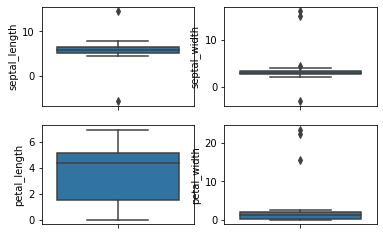

In [312]:
#이상치 확인 

fig = plt.figure()

plt.subplot(221)
sns.boxplot(data=iris, y='septal_length')
plt.subplot(222)
sns.boxplot(data=iris, y='septal_width')
plt.subplot(223)
sns.boxplot(data=iris, y='petal_length')
plt.subplot(224)
sns.boxplot(data=iris, y='petal_width')

In [313]:
# #IQR 구하기 
# first_Q = iris.septal_length.sort_values().iloc[int(109*0.25)]
# forth_Q = iris.septal_length.sort_values().iloc[int(109*0.75)]
# IQR = forth_Q - first_Q

# #UPPER_limit, lower_limit 구하기 
# upper_limit = forth_Q + (1.5*IQR)
# lower_limit = first_Q - (1.5*IQR)

# #각 값 제거하기
# # iris.drop(iris.loc[iris.septal_length < lower_limit].index,inplace = True)
# # iris.drop(iris.loc[iris.septal_length > upper_limit].index,inplace = True)

# iris.loc[iris.septal_length < lower_limit,'septal_length'] = lower_limit
# iris.loc[iris.septal_length > upper_limit, 'septal_length'] = upper_limit

In [314]:
#결측치 제거 자동화 


for i in iris.columns:

    #IQR 구하기 
    first_Q = iris[i].sort_values().iloc[int(109*0.25)]
    forth_Q = iris[i].sort_values().iloc[int(109*0.75)]
    IQR = forth_Q - first_Q

    #UPPER_limit, lower_limit 구하기 
    upper_limit = forth_Q + (1.5*IQR)
    lower_limit = first_Q - (1.5*IQR)

    #각 값 제거하기
    iris.loc[iris[i] < lower_limit,i] = lower_limit 
    iris.loc[iris[i] > upper_limit,i] = upper_limit
  

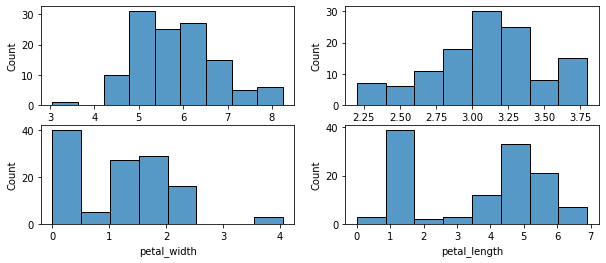

In [315]:
fig = plt.figure(figsize = (10,4))

plt.subplot(221)
sns.histplot(data=iris,x='septal_length')

plt.subplot(222)
sns.histplot(data=iris,x='septal_width')
plt.subplot(223)
sns.histplot(data=iris,x='petal_width')
plt.subplot(224)
sns.histplot(data=iris,x='petal_length')

### 모델링 


In [316]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [317]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [318]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax")) # 1이 아니고 클래스 수 3이다

# model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
              


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                50        
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dense_32 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 128ms/step - loss: 0.0676 - accuracy: 1.0000
loss= 0.06762025505304337
acc= 1.0


In [320]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.9636286e-01 3.6317478e-03 5.3255344e-06]
 [2.9743323e-03 9.8077559e-01 1.6249970e-02]
 [6.4960986e-01 3.4564000e-01 4.7501144e-03]
 [5.3492986e-04 9.8847395e-01 1.0991111e-02]
 [9.9607348e-01 3.9213095e-03 5.2020218e-06]
 [9.9932706e-01 6.6594704e-04 7.0516885e-06]
 [9.9865592e-01 1.3428896e-03 1.1458252e-06]
 [9.9840242e-01 1.5957627e-03 1.7322243e-06]
 [2.1294993e-03 9.7958654e-01 1.8283911e-02]
 [9.9413741e-01 5.8549317e-03 7.6688957e-06]
 [3.2416250e-05 4.5765224e-01 5.4231536e-01]
 [5.1684550e-04 9.6660244e-01 3.2880805e-02]
 [9.9458992e-01 5.4032747e-03 6.7264041e-06]
 [8.3532591e-08 3.1592757e-02 9.6840715e-01]
 [9.9387336e-01 6.1150254e-03 1.1606969e-05]
 [1.4286920e-04 9.0780467e-01 9.2052467e-02]
 [1.8935392e-04 9.6993870e-01 2.9871918e-02]
 [9.9322999e-01 6.7569911e-03 1.3049629e-05]
 [9.9582076e-01 4.1733040e-03 5.9934200e-06]
 [2.2944493e-02 9.7575915e-01 1.2963923e-03]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]
